[np.float64(1.1102230246251565e-16)]


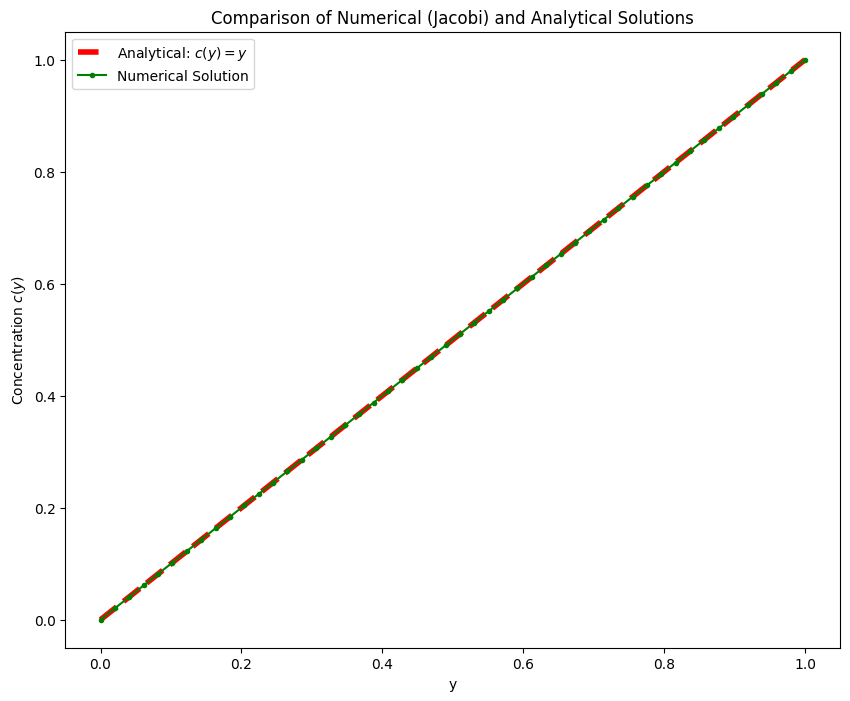

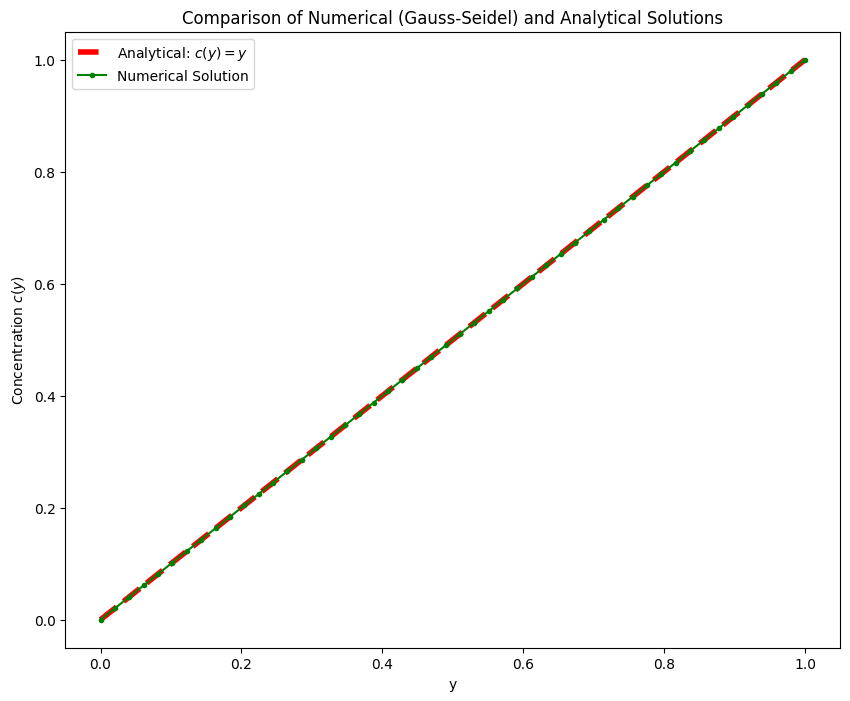

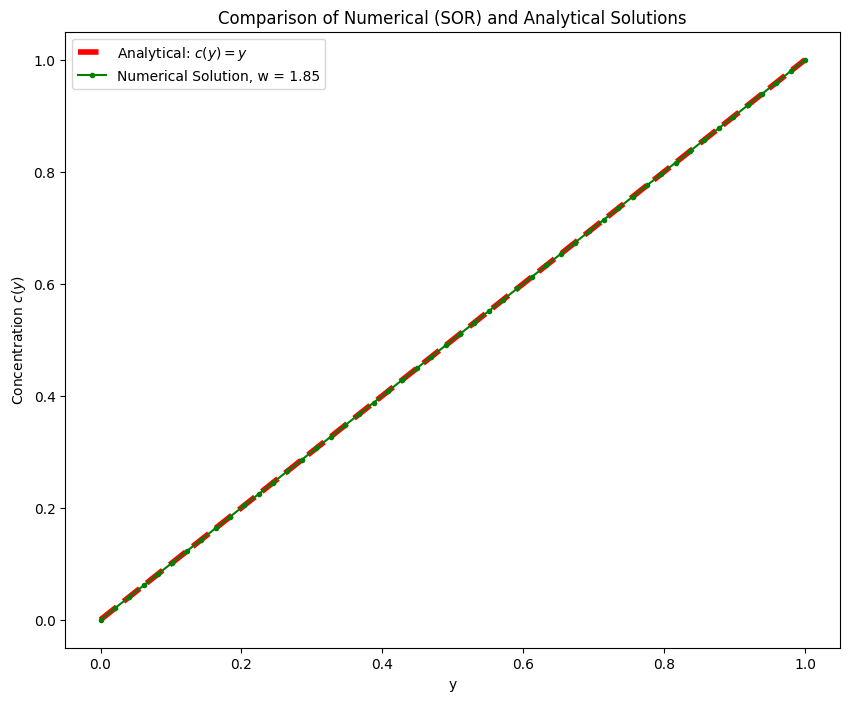

'\np_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nw_list = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]\njacobi_iters, gs_iters, sor_iters = [], [], []\n\nfor p in p_list:\n    numerical_solution_j, counter_j = jacobi_iteration(grid, 50, p)\n    numerical_solution_g, counter_g = gauss_seidel_iteration(grid, 50, p)\n    numerical_solution_s, counter_s = successive_over_relaxation(grid, 50, w, p)\n    print(counter_j)\n    jacobi_iters.append(counter_j)\n    gs_iters.append(counter_g)\n    sor_iters.append(counter_s)    \n\n\n# Plot the results\nplt.figure(figsize=(10, 8))\nplt.plot(p_list, jacobi_iters, "b-o", label="Jacobi")\nplt.plot(p_list, gs_iters, "r-s", label="Gauss-Seidel")\nplt.plot(p_list, sor_iters, "g-^", label=f"SOR (w={w})")\n\nplt.yscale("log")  # Log scale for iterations\nplt.xlabel("p")\nplt.ylabel("Iterations k")\nplt.legend()\nplt.title("Convergence of Iterative Methods")\nplt.grid(True, which="both", linestyle="--")\nplt.show()\n'

In [17]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from src.funs_1_6_jacobi import jacobi_iteration
from src.funs_1_6_gauss import gauss_seidel_iteration
from src.funs_1_6_successive_over_relaxation import successive_over_relaxation

# grid with boundary conditions c(y) = y
Ny = 50  # N grid points along y
Nx = 50  # N grid points along x
grid = np.zeros((Ny, Nx))

# boundary condition
for i in range(Ny):
    grid[i, :] = i / (Ny - 1)  # Normalize 

w = 1.85
numerical_solution_j, counter_j = jacobi_iteration(grid, 50, 5)
numerical_solution_g, counter_g = gauss_seidel_iteration(grid, 50, 5)
numerical_solution_s, counter_s = successive_over_relaxation(grid, 50, w, 5)
print(counter_j)
y_values = np.linspace(0, 1, Ny)
numerical_profile_j = numerical_solution_j[:, Nx//2]  # for comparison (middle column)
numerical_profile_g = numerical_solution_g[:, Nx//2]
numerical_profile_s = numerical_solution_s[:, Nx//2]
analytical_profile = y_values  # Since c(y) = y analytically

plt.figure(figsize=(10, 8))
plt.plot(y_values, analytical_profile, label="Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
plt.plot(y_values, numerical_profile_j, label="Numerical Solution", marker="o", markersize=3, linestyle="-", color="green")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical (Jacobi) and Analytical Solutions")
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'1_6_jacobi_comparison_plot.png')
plt.savefig(save_path, dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(y_values, analytical_profile, label="Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
plt.plot(y_values, numerical_profile_g, label="Numerical Solution", marker="o", markersize=3, linestyle="-", color="green")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical (Gauss-Seidel) and Analytical Solutions")
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'1_6_gauss_seidel_comparison_plot.png')
plt.savefig(save_path, dpi=300)
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(y_values, analytical_profile, label= "Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
plt.plot(y_values, numerical_profile_s, label= f"Numerical Solution, w = {w}", marker="o", markersize=3, linestyle="-", color="green")
plt.xlabel("y")
plt.ylabel("Concentration $c(y)$")
plt.legend()
plt.title("Comparison of Numerical (SOR) and Analytical Solutions")
save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, f'1_6_successive_over_relaxation_plot.png')
plt.savefig(save_path, dpi=300)
plt.show()
"""
p_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
w_list = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
jacobi_iters, gs_iters, sor_iters = [], [], []

for p in p_list:
    numerical_solution_j, counter_j = jacobi_iteration(grid, 50, p)
    numerical_solution_g, counter_g = gauss_seidel_iteration(grid, 50, p)
    numerical_solution_s, counter_s = successive_over_relaxation(grid, 50, w, p)
    print(counter_j)
    jacobi_iters.append(counter_j)
    gs_iters.append(counter_g)
    sor_iters.append(counter_s)    


# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(p_list, jacobi_iters, "b-o", label="Jacobi")
plt.plot(p_list, gs_iters, "r-s", label="Gauss-Seidel")
plt.plot(p_list, sor_iters, "g-^", label=f"SOR (w={w})")

plt.yscale("log")  # Log scale for iterations
plt.xlabel("p")
plt.ylabel("Iterations k")
plt.legend()
plt.title("Convergence of Iterative Methods")
plt.grid(True, which="both", linestyle="--")
plt.show()
"""


